In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [4]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [5]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i  # This code is used for this assignment only

            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]

            # Compute output
            yi_hat = xi @ thetas  # Dự đoán đầu ra  (1,4) @ (4,1) -> (1,1)

            # Compute loss L
            L = (yi_hat - yi)**2  # Hàm mất mát (loss)

            # Compute gradient for loss
            k = 2 * (yi_hat - yi)  # Gradient của hàm mất mát

            # Compute gradient
            dthetas = xi*k  # Gradient đối với trọng số  -> (1,4)

            # update theta
            thetas = thetas - learning_rate * dthetas.T  # Cập nhật trọng số 

            # logging
            losses.append(L.squeeze())  # Ghi lại giá trị hàm mất mát

        # Lưu trọng số qua các epoch
        thetas_path.append(thetas)

    return thetas_path, losses


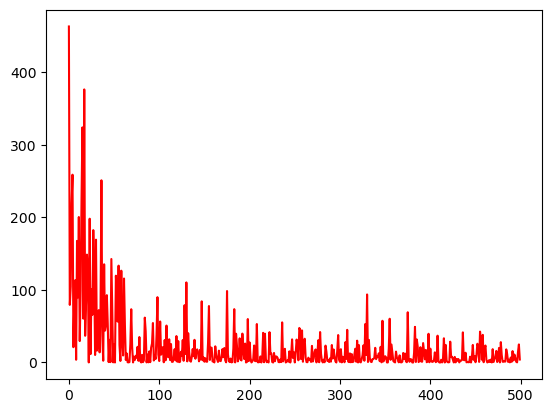

In [6]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color = 'r')
plt.show()

Question 1: Stochastic Gradient Descent

In [7]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01 )
print(np.sum(losses))

8392.629213090673


In [8]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
            132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
            185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
            165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
            169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
            77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
            195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
            92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
            174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
            129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
            168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
            133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
            154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i: i + minibatch_size]
            yi = y_shuffled[i: i + minibatch_size]

            #compute output
            yi_hat = xi @ thetas # (minibatch_size, 4) @ (4, 1) -> (minibatch_size, 1)

            #compute loss
            loss = (yi_hat - yi)**2 # (minibatch_size, 1)

            #compute derivative of lose
            k = 2*(yi_hat - yi)

            #compute derivative of parameters
            gradients = (xi.T @ k)/ minibatch_size 

            #update parameters
            thetas = thetas - learning_rate*gradients 
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

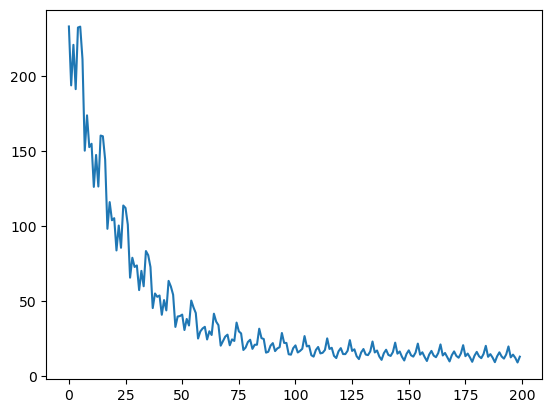

In [9]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200])
plt.show()

Question 2: MiniBatch Gradient Descent

In [10]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses), 2))

11402.48


In [11]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # compute output
        y_hat = X_b @ thetas # (N, features: 4) @ (features: 4, 1) -> (N, 1)

        # Compute loss
        loss = (y_hat - y)**2  # -> (N, 1)

        # Compute losss’s derivative
        k = 2*(y_hat - y)

        # computer parameters’ derivative
        gradients = (X_b.T @ k)/N

        # Update parameters
        thetas = thetas- learning_rate*gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

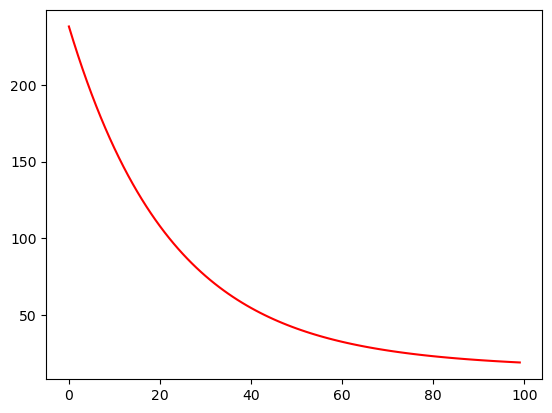

In [12]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color = 'r')
plt.show()

Question 3: Batch Gradient Descent

In [13]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46
